# # Resume:

In this proyectects, a table with 178 different wines an teir attributes was analyzed to segmentate them in different types. The main clustering algorithm used was KMeans from sklearn.

The steps we´ll flollow are:
  1. Import relevant tools.
  2. Load / Analyze the data to get a good insight on it´s characteristics.
  3. Clean the data / get it readi to be fitted with a model.
  4. Plot a Dendogram to help us identify the amount of clusters in our data.
  5. Cluster the data using Kmeans with the ammount of clusters defined in the previous step.
  6. Apply a dimensionality reduction to our data, then plot a scatter of it with dots colored by cluster.

The data was taken from the folowing link.
https://www.kaggle.com/harrywang/wine-dataset-for-clustering

## Imports:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import mysql.connector

%matplotlib inline

from sklearn.cluster import KMeans 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Importing / Exploring the data 

In [7]:
# Import

db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="SAntafeclan1"
    )

mycursor = db.cursor()
mycursor.execute("use proyectos")

data_unshuffled= pd.read_sql("SELECT * FROM wines", con=db)

# data_unshuffled = pd.read_csv("wine-clustering.csv")

data = data_unshuffled.sample(frac = 1)
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060
75,11.66,1.88,1.92,16.0,97,1.61,1.57,0.34,1.15,3.80,1.23,2.14,428
79,12.70,3.87,2.40,23.0,101,2.83,2.55,0.43,1.95,2.57,1.19,3.13,463
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520


In [8]:
data.shape

(178, 13)

In [4]:
data.describe() #Proline has the highest mean by far

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.isna().sum() #Looking for NaNs

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.dtypes # All numerical

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

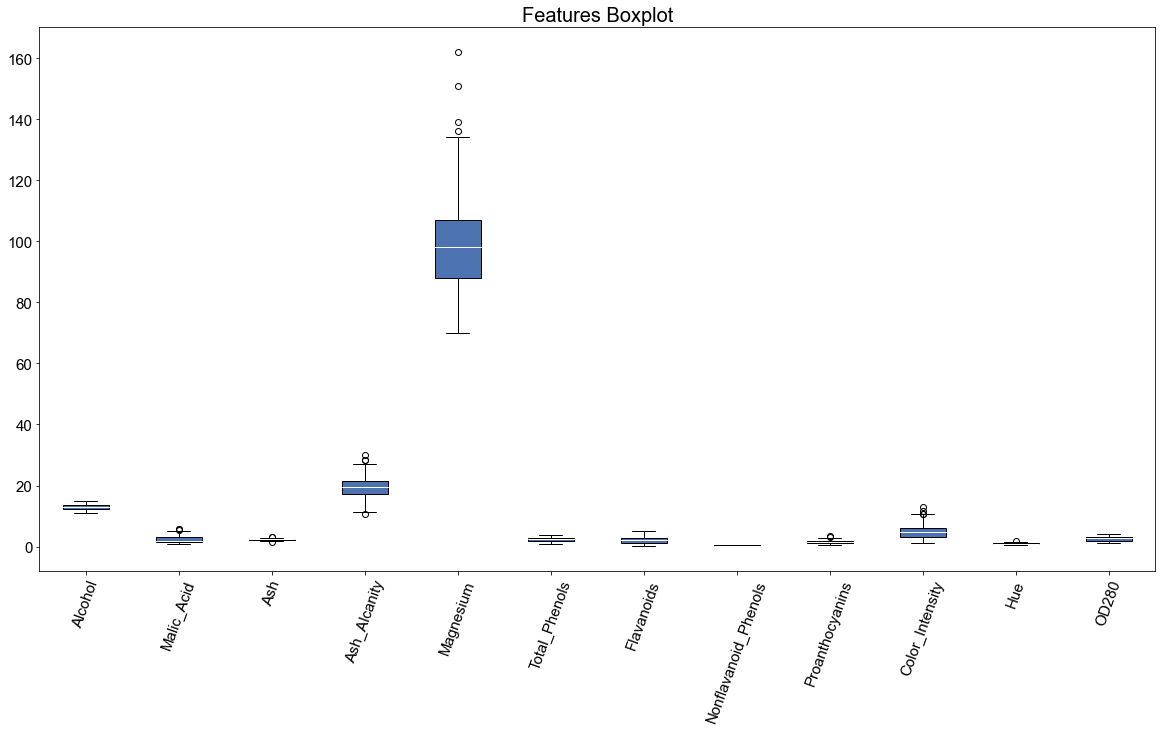

In [7]:
# Let´s make a boxplot to see the range of values our atributes can take

data_no_proline = data.drop("Proline", axis=1) #drop the proline column becouse it has way higher mean than the others

ls_features = list(data_no_proline.keys()) # column names
fig, ax = plt.subplots(figsize=(20, 10))
plt.style.use("seaborn")
plt.title("Features Boxplot" , fontdict = {'fontsize' : 20})

ax.boxplot(data_no_proline.values, 
           labels = ls_features ,
           medianprops = dict(color="white"),
           patch_artist=True)

plt.xticks(rotation=70);
ax.tick_params(axis='both', labelsize=15)

## Cleaning the data

In [8]:
# we just need to scale it

sc = StandardScaler()

data_scaled = sc.fit_transform(data)

## Makeing a dendogram / identifying clusters

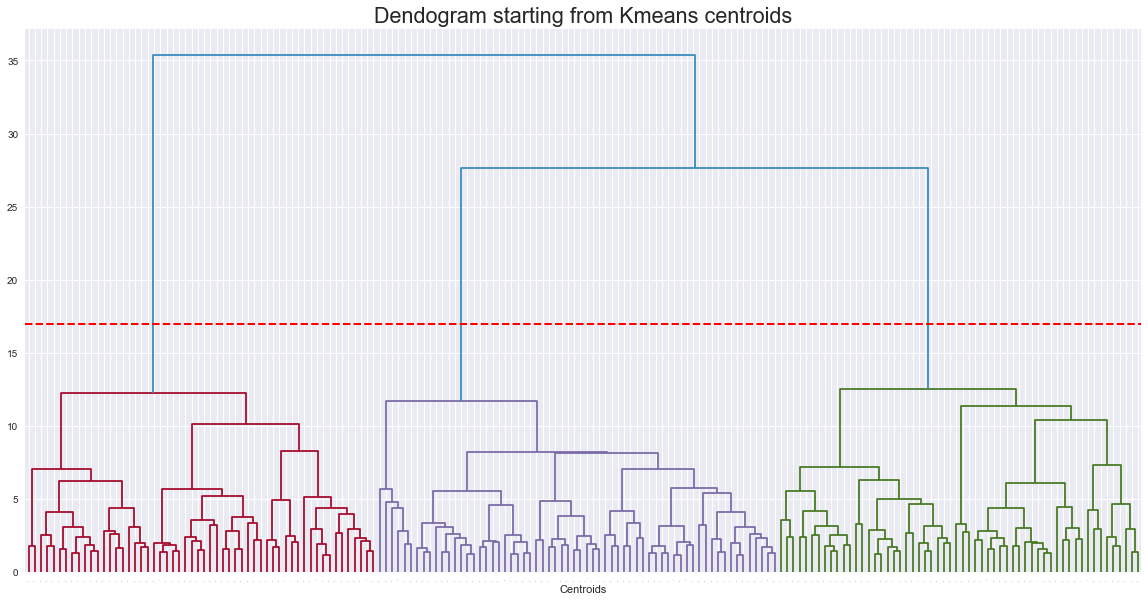

In [9]:
# Let´s make a dendogram to identify the ammount of clusters in our data

# Aglomerative clustering 
Z = linkage(data_scaled,
            method = 'ward',
            metric = 'euclidean') 

plt.figure(figsize=(20,10))
dendrogram(Z, leaf_rotation =90, 
           color_threshold = 17)
plt.style.use("bmh")
plt.rcParams.update({'font.size': 15})
plt.title('Dendogram starting from Kmeans centroids')
plt.xlabel("Centroids")
plt.xticks(fontsize = 0)
plt.axhline(y=17, color='red', linestyle='--');



We found there are 3 main clusters.

## Dividing the data in 3 clusters using KMean

In [10]:
# Clustering 

kmeans_3 = KMeans(n_clusters = 3, n_init = 50 )

kmeans_3.fit(data_scaled)

cluster_3 = kmeans_3.labels_

In [15]:
# Add a cluster column to the data

data["cluster"] = cluster_3

data.head(7)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,cluster
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,1
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,1
163,12.96,3.45,2.35,18.5,106,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675,0
25,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830,2
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,2
44,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885,2
33,13.76,1.53,2.70,19.5,132,2.95,2.74,0.50,1.35,5.40,1.25,3.00,1235,2


In [12]:
# Apply dimensionality reduction to plot the data

pca = PCA(n_components = 2)

data_2D = pca.fit_transform(data_scaled)

pca_final = pd.DataFrame(data_2D, columns=['X', 'Y'])

pca_final.head()

,X,Y
0,0.762064,3.375054
1,1.420569,1.418207
2,-2.597497,-0.697966
3,0.990079,-0.940667
4,2.753628,-0.789438


In [13]:
pca_final["cluster_3"] = cluster_3

pca_final.head()

,X,Y,cluster_3
0,0.762064,3.375054,1
1,1.420569,1.418207,1
2,-2.597497,-0.697966,0
3,0.990079,-0.940667,2
4,2.753628,-0.789438,2


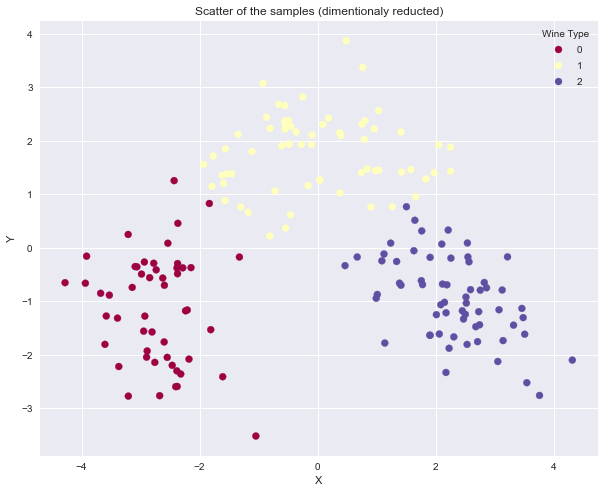

In [57]:
# Scatter of the dimentionaly reducted data, coloring each sample by it´s acording cluster

fig, ax = plt.subplots(figsize=(10,8))

plt.style.use("seaborn")
scatter = ax.scatter (x = pca_final["X"],
                      y = pca_final["Y"],
                      c=pca_final["cluster_3"],
                      cmap= "Spectral")

ax.set(xlabel="X", 
       ylabel= "Y", 
       title = "Scatter of the samples (dimentionaly reducted)")

plt.legend(*scatter.legend_elements(), 
           title="Wine Type");
